In [10]:
from sklearn import datasets
import numpy as np
from sklearn import linear_model
from sklearn import svm
from numba import jit
%load_ext line_profiler
import cProfile

# from sklearn.svm import SVC

The line_profiler extension is already loaded. To reload it, use:
  %reload_ext line_profiler


In [11]:
@jit
def my_clf(dat, tar):
    clf = linear_model.LinearRegression()
    return clf.fit (dat, tar)

In [12]:
dat = np.random.rand(100, 1e6)
tar = np.random.rand(100)

/Users/arkilic/anaconda/envs/dev/lib/python3.5/site-packages/ipykernel/__main__.py:1: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  if __name__ == '__main__':


In [13]:
cProfile.run('my_clf(dat, tar)')

         39512 function calls (36901 primitive calls) in 9.562 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000    0.000    0.000 <frozen importlib._bootstrap>:272(_module_repr)
        1    0.000    0.000    0.000    0.000 <frozen importlib._bootstrap>:427(has_location)
        1    0.000    0.000    0.000    0.000 <frozen importlib._bootstrap>:588(_module_repr_from_spec)
       82    0.000    0.000    0.000    0.000 <frozen importlib._bootstrap>:996(_handle_fromlist)
        1    0.077    0.077    9.490    9.490 <ipython-input-11-d2cb90a6e38e>:1(my_clf)
        1    0.001    0.001    9.562    9.562 <string>:1(<module>)
        1    0.000    0.000    0.000    0.000 <string>:12(__new__)
        2    0.000    0.000    0.000    0.000 __init__.py:47(create_string_buffer)
       12    0.000    0.000    0.000    0.000 __init__.py:483(cast)
        1    0.000    0.000    0.000    0.000 __init__.py:487(s

In [34]:
boston = datasets.load_boston()
print(type(boston))
bostdat = boston.data
print(boston.target[:100])
print(boston.data[:100])
print(boston.data[0][5:100:5])

<class 'sklearn.datasets.base.Bunch'>
[ 24.   21.6  34.7  33.4  36.2  28.7  22.9  27.1  16.5  18.9  15.   18.9
  21.7  20.4  18.2  19.9  23.1  17.5  20.2  18.2  13.6  19.6  15.2  14.5
  15.6  13.9  16.6  14.8  18.4  21.   12.7  14.5  13.2  13.1  13.5  18.9
  20.   21.   24.7  30.8  34.9  26.6  25.3  24.7  21.2  19.3  20.   16.6
  14.4  19.4  19.7  20.5  25.   23.4  18.9  35.4  24.7  31.6  23.3  19.6
  18.7  16.   22.2  25.   33.   23.5  19.4  22.   17.4  20.9  24.2  21.7
  22.8  23.4  24.1  21.4  20.   20.8  21.2  20.3  28.   23.9  24.8  22.9
  23.9  26.6  22.5  22.2  23.6  28.7  22.6  22.   22.9  25.   20.6  28.4
  21.4  38.7  43.8  33.2]
[[  6.32000000e-03   1.80000000e+01   2.31000000e+00 ...,   1.53000000e+01
    3.96900000e+02   4.98000000e+00]
 [  2.73100000e-02   0.00000000e+00   7.07000000e+00 ...,   1.78000000e+01
    3.96900000e+02   9.14000000e+00]
 [  2.72900000e-02   0.00000000e+00   7.07000000e+00 ...,   1.78000000e+01
    3.92830000e+02   4.03000000e+00]
 ..., 
 [  1.208

In [56]:
boston.data.dtype.fields

In [2]:
from sklearn import linear_model
import numpy as np

In [3]:
clf = linear_model.LinearRegression()
x = np.array([[0, 0], [1, 1], [2, 2]])
y = np.array([0, 1, 2])
clf.fit (x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [5]:
clf.coef_

array([ 0.5,  0.5])

Coefficients: 
 [ 938.23786125]
Residual sum of squares: 2548.07
Variance score: 0.47


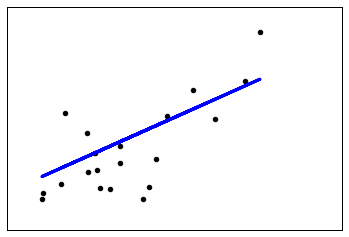

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model

%matplotlib inline
# Load the diabetes dataset
diabetes = datasets.load_diabetes()


# Use only one feature
diabetes_X = diabetes.data[:, np.newaxis, 2]

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes.target[:-20]
diabetes_y_test = diabetes.target[-20:]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean square error
print("Residual sum of squares: %.2f"
      % np.mean((regr.predict(diabetes_X_test) - diabetes_y_test) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(diabetes_X_test, diabetes_y_test))

# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.plot(diabetes_X_test, regr.predict(diabetes_X_test), color='blue',
         linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()
